<div style="
    font-weight: bold; 
    font-size: 28px;
    margin-bottom: 10px;
    ">
    Heart Disease Prediction
</div>

<div style="font-size:15px">
<b>Name</b>: Salman Siddiqui <br>
<b>Email</b>: SalmanSiddiqui172002@gmail.com
</div>

<hr style="
    border: none;
    height: 2px;
    background: black;
    "> 

<div style="text-align: center;">
    <img src="assets/images/intro.excalidraw.png" width="500px">
</div>

<div style="font-size:15px">

**Problem**

The dataset we are working with contains information about heart patients and their associated health metrics, including age, blood pressure, heart rate, and more. Our objective is to develop a predictive model to identify patients at risk of heart disease.

**Objectives**

<ol>
    <li style="margin-bottom: 8px; font-weight: bold;">Exploratory Data Analysis (EDA)</li>
    <p>
        A. Summary Statistics <br> 
        B. Univariate Analysis <br>
        C. Bivariate Analysis <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Preprocessing Steps</li>
    <p>
        A. Remove Irrelevant Features <br> 
        B. Handle Missing Values <br>
        C. Address Outliers <br>
        D. Encode Categorical Variables <br>
        E. Feature Scaling <br>
        F. Transforming Skewed Features <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Building</li>
     <p>
        A. Decision Trees <br> 
        B. Random Forest<br>
        C. K-Nearest Neighbors (KNNs) <br>
        D. Support Vector Machines (SVMs) <br>
    </p>
    <li style="font-weight: bold;">Evaluate and Compare Model Performance</li>
    <p>
        A. Precision <br> 
        B. Recall <br>
        C. F1-score <br>
    </p>
</ol>

<div style="font-size:15px">
    
**Relevant Libraries**

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn library
from sklearn.model_selection import train_test_split

# Helper functions
from utils.helpers import *

# styling
from tqdm.notebook import tqdm
from prettytable import PrettyTable

<h2 style="font-weight: bold; font-size: 22px; margin-bottom: 10px;">1. Exploratory Data Analysis (EDA)</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<div style="font-size:15px">

We will begin by loading the dataset. This dataset was obtained from Kaggle and can be found [here](https://www.kaggle.com/datasets/arezaei81/heartcsv).  

In [2]:
# Read in the dataset
data = pd.read_csv("data/heart.csv")

# View any 3 rows of the dataset
data.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


<div style="font-size:15px">

The table below provides a summary of the dataset's columns, including the values they contain and their respective meanings.

<table>
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><b>age</b></td>
        <td>Age of the individual (in years).</td>
    </tr>
    <tr>
        <td><b>sex</b></td>
        <td>Gender of the individual: 0 = Male, 1 = Female.</td>
    </tr>
    <tr>
        <td><b>cp</b></td>
        <td>
            Type of chest pain:<br>
            - 0: Typical angina<br>
            - 1: Atypical angina<br>
            - 2: Non-anginal pain<br>
            - 3: Asymptomatic
        </td>
    </tr>
    <tr>
        <td><b>trestbps</b></td>
        <td>Resting blood pressure (mmHg).</td>
    </tr>
    <tr>
        <td><b>chol</b></td>
        <td>Serum cholesterol level (mg/dL).</td>
    </tr>
    <tr>
        <td><b>fbs</b></td>
        <td>Fasting blood sugar: 1 = >120 mg/dL, 0 = ≤120 mg/dL.</td>
    </tr>
    <tr>
        <td><b>restecg</b></td>
        <td>
            Resting electrocardiogram results:<br>
            - 0: Normal<br>
            - 1: ST-T wave abnormality<br>
            - 2: Probable/definite left ventricular hypertrophy by Estes' criteria.
        </td>
    </tr>
    <tr>
        <td><b>thalach</b></td>
        <td>Maximum heart rate achieved.</td>
    </tr>
    <tr>
        <td><b>exang</b></td>
        <td>Exercise-induced angina: 1 = Yes, 0 = No.</td>
    </tr>
    <tr>
        <td><b>oldpeak</b></td>
        <td>ST depression induced by exercise relative to rest (in mm).</td>
    </tr>
    <tr>
        <td><b>slope</b></td>
        <td>
            Slope of the peak exercise ST segment:<br>
            - 0: Upsloping<br>
            - 1: Flat<br>
            - 2: Downsloping
        </td>
    </tr>
    <tr>
        <td><b>ca</b></td>
        <td>Number of major vessels (0–4) colored by fluoroscopy.</td>
    </tr>
    <tr>
        <td><b>thal</b></td>
        <td>
            Type of thalassemia:<br>
            - 0: Normal<br>
            - 1: Reversible defect<br>
            - 2: Fixed defect <br>
            - 3: Not described
        </td>
    </tr>
    <tr>
        <td><b>target</b></td>
        <td>Presence of heart disease: 0 = No, 1 = Yes.</td>
    </tr>
</table>

<div style="font-size:15px">

When we plot charts later, these numerical encodings may not be easily understood by the audience. To improve clarity, let's create a series that maps these encodings to their actual meanings.

In [3]:
ser_encodings = pd.Series(
    {
        ("sex", 0): "Male",
        ("sex", 1): "Female",
        ("cp", 0): "Typical",
        ("cp", 1): "ATypical",
        ("cp", 2): "Non-anginal",
        ("cp", 3): "Asymptomatic",
        ("fbs", 0): "<= 120 mg/dL",
        ("fbs", 1): "> 120 mg/dL",
        ("restecg", 0): "Normal",
        ("restecg", 1): "ST-T Abnormal.",
        ("restecg", 2): "LV Hyper.",
        ("exang", 0): "No",
        ("exang", 1): "Yes",
        ("slope", 0): "Unsloping",
        ("slope", 1): "Flat",
        ("slope", 2): "Downsloping",
        ("ca", 0): "None",
        ("ca", 1): "One",
        ("ca", 2): "Two",
        ("ca", 3): "Three",
        ("ca", 4): "Four",
        ("thal", 0): "Normal",
        ("thal", 1): "Fixed",
        ("thal", 2): "Reversible",
        ("thal", 3): "Not Described",
        ("target", 0): "Negative",
        ("target", 1): "Positive",
    }
)

ser_titles = pd.Series(
    {
        "sex": "Gender",
        "cp": "Type of Chest Pain",
        "fbs": "Fasting Blood Sugar",
        "restecg": "Electrocardiogram Results (Resting)",
        "exang": "Angina (Exercise Induced)",
        "slope": "Slope of Peak Exercise ST SEgment",
        "ca": "# Major Vessels colored by Fluoroscopy",
        "thal": "Thalium Stress Test Results",
        "target": "Heart Disease Status",
    }
)

<div style="font-size:15px">

Let’s start with a brief overview of our data.

In [4]:
# Get a summary of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Number of Entries</li>
    <p>
        - The dataset contains 303 entries, indexed from 0 to 302. <br> 
        - For a machine learning problem, this represents a relatively small dataset for model training.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Columns</li>
    <p>
        - There are 14 columns, each corresponding to specific attributes of health patients.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Data Types</li>
    <p>
        - All columns except one are of type <code>int64</code>. <br>
        - The exception is the <code>oldpeak</code> column, which is of type <code>float64</code>.
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Missing Values</li>
    <p>
        - There are no missing values, as all columns have 303 valid entries. <br>
    </p>
</ul>

<div style="font-size:15px">

**Note**: Based on the data types and the feature explanations provided earlier, we can conclude that 9 columns (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are numerical in terms of their data types but represent categorical values semantically. To ensure correct analysis and results, these columns should be converted to a different data type (e.g., string).

In [5]:
# Rough Work
features = data.columns

# Define the continuous features
features_continuous = pd.Index(["age", "trestbps", "chol", "thalach", "oldpeak"])

# Obtain the discrete features dynamically
features_discrete = features.difference(features_continuous)

# Convert data type of discrete features (int64) to string (object)
data[features_discrete] = data[features_discrete].astype("object")

# Verify
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">A. Summary Statistics</h3>

<div style="font-size:15px">

First, let’s explore the summary statistics of our numerical attributes.

In [6]:
# Get the descriptive statistics of numerical columns to two decimal places
# Transpose for better readability
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">age</li>
    <p>
        - The minimum value is 29.0 years <br>
        - The median value if 55.0 years  <br>
        - The maximum value if 77.0 years  <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
</ul>

<div style="font-size:15px">
    
Next, let's examine our categorical features.

In [7]:
# Get the descriptive statistics of categorical columns
data.describe(include=object)

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
</ul>

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">B. Univariate Analysis</h3>

<div style="font-size:15px">
    
In this section, we'll focus on individual features as standalone variables and visualize their distributions. Let's begin with continuous features. We'll use histograms to visualize the distribution, central tendency, spread, and shape of the feature.

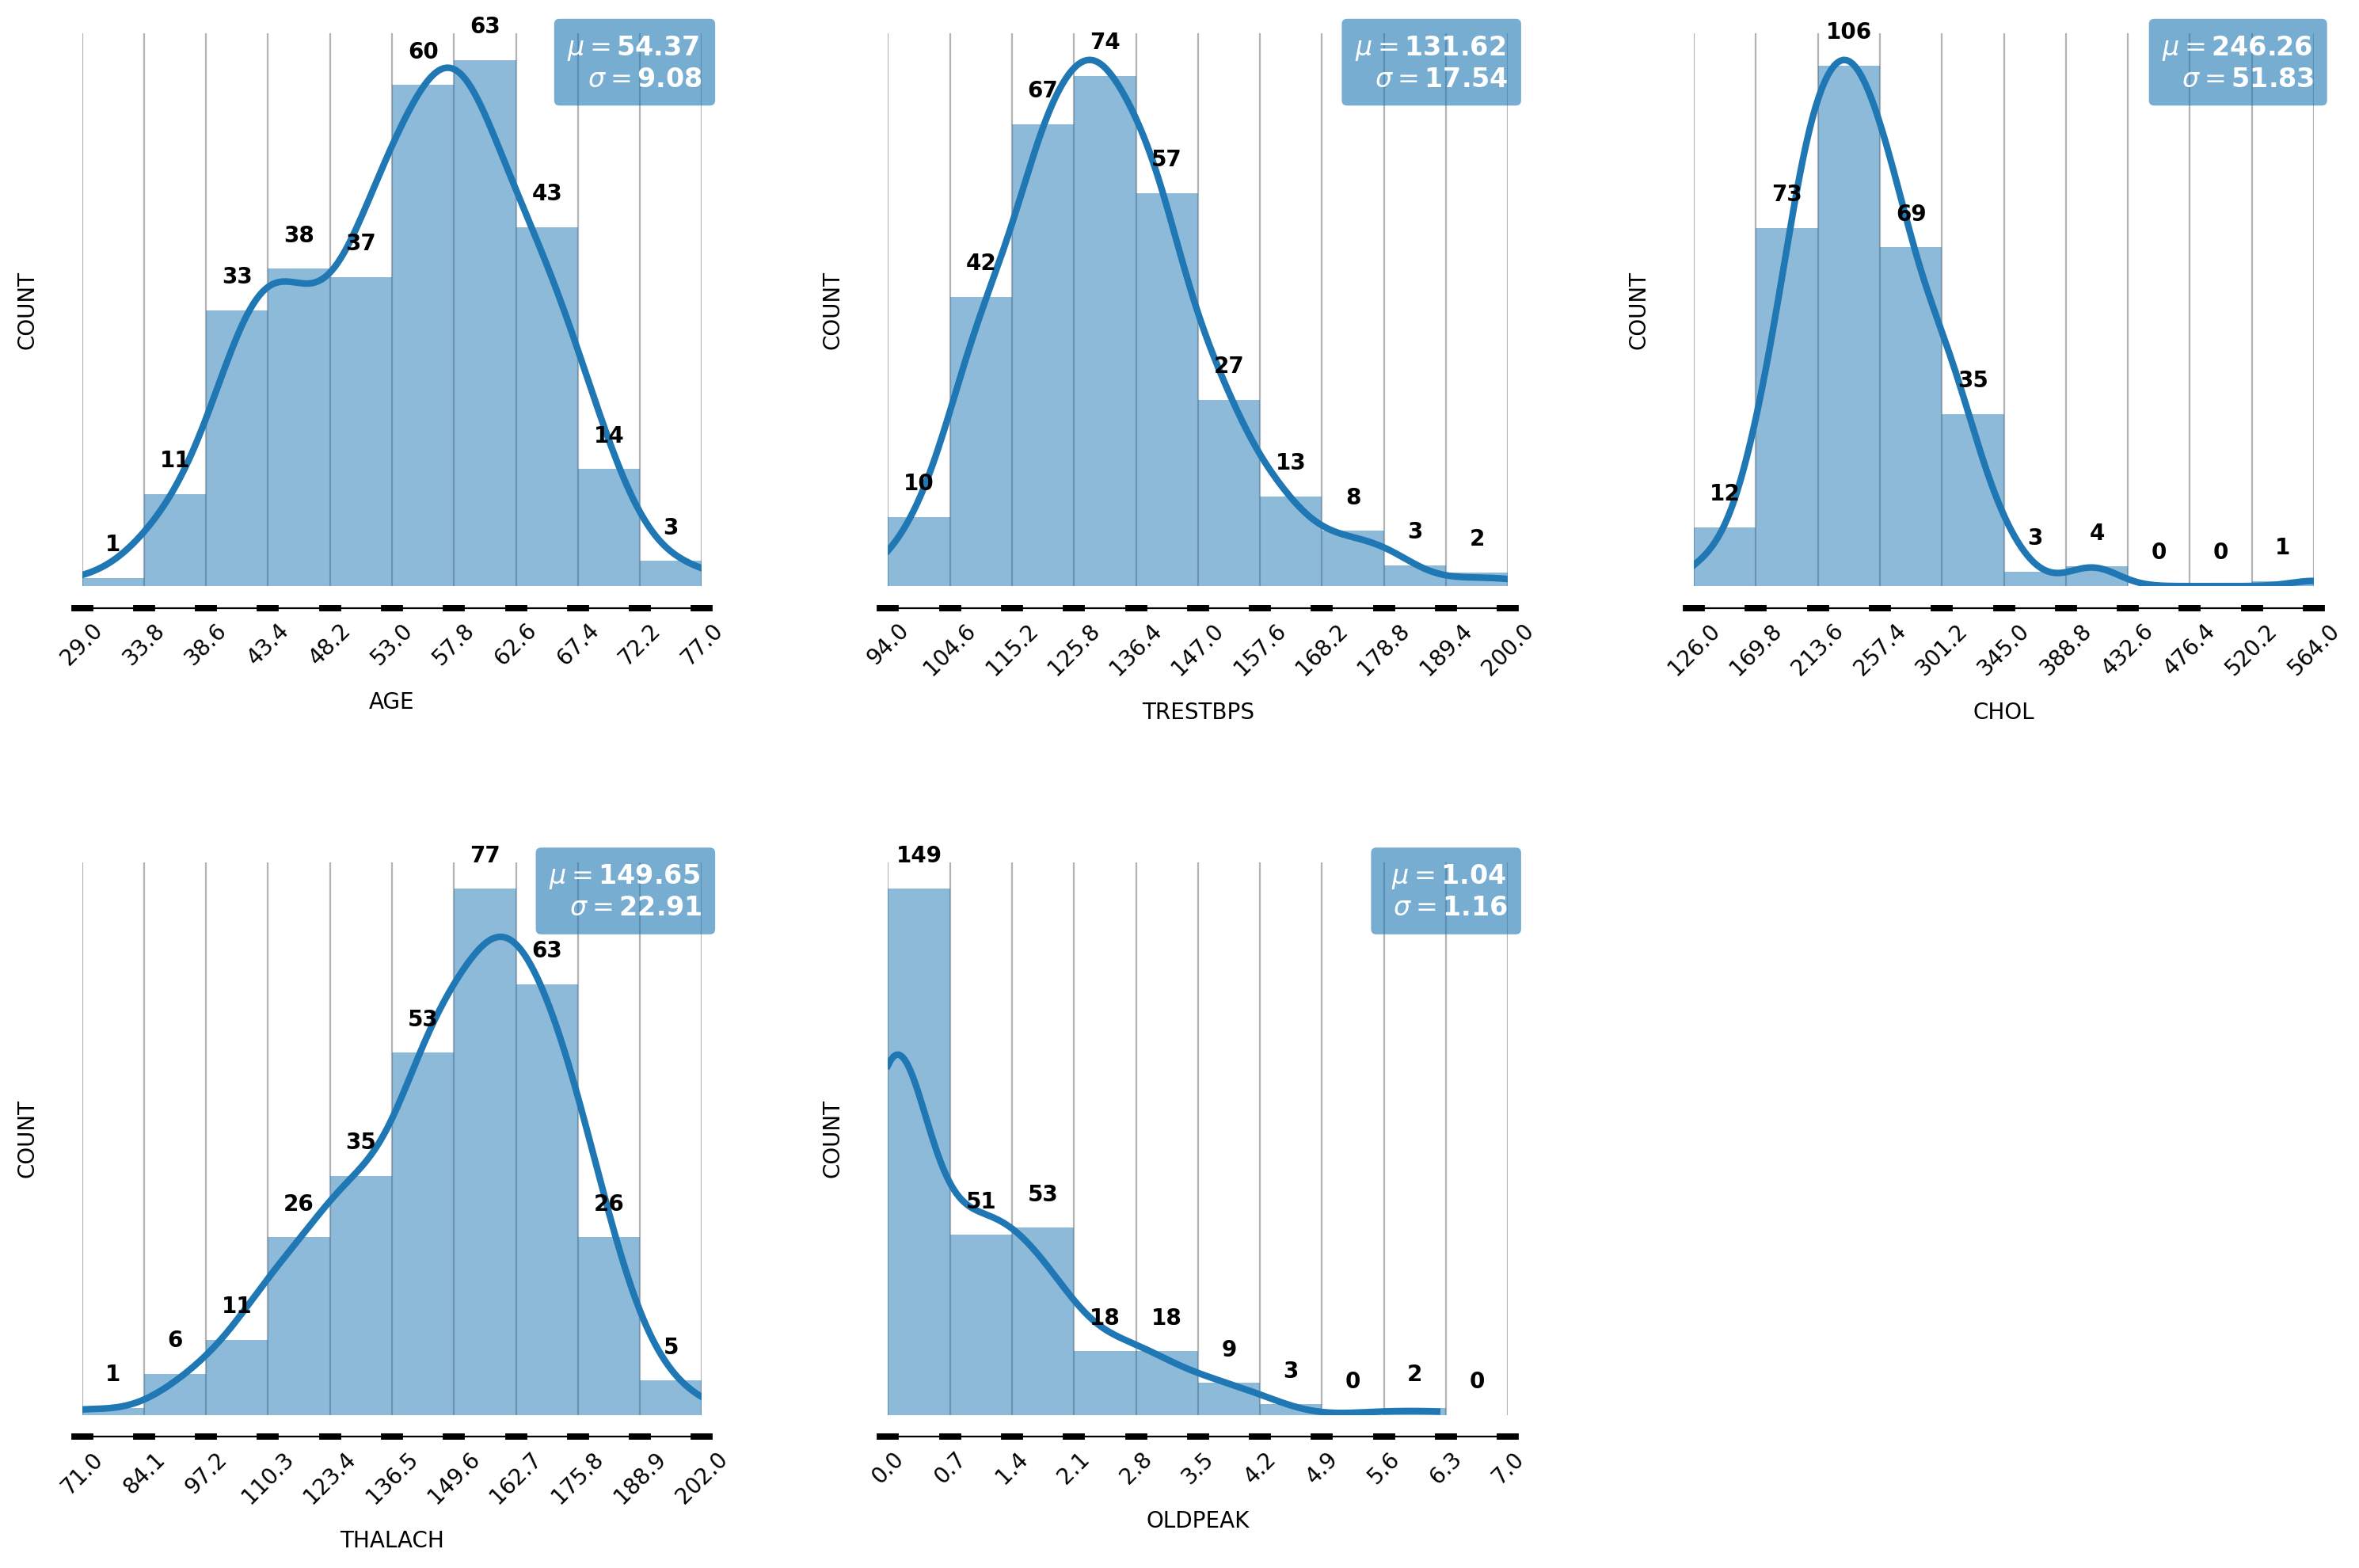

In [8]:
# Obtain the continuous data
data_continuous = data[features_continuous]

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=200)

# Loop through the numerical columns and plot
for col, ax in zip(data_continuous.columns, axes.flatten()):
    datum = data_continuous[col]

    # Get the bin_edges (for rounding later)
    _, bin_edges = np.histogram(
        datum,
        range=(
            np.floor(datum.min()),
            np.ceil(datum.max()),
        ),
    )

    # Contruct the plot
    sns.histplot(
        data=datum,
        bins=bin_edges,
        kde=True,
        edgecolor="none",
        line_kws=dict(lw=3),
        ax=ax,
    )

    # Label the bars
    ax.bar_label(*ax.containers, padding=10, fontweight="bold", fontsize=10)

    # Annotation for mean and sta
    mean = datum.mean()
    std = datum.std()
    text = f"$\mu=${mean:.2f} \n $\sigma=${std:.2f}"

    ax.text(
        x=1,
        y=1,
        s=text,
        color="white",
        fontweight="bold",
        fontsize=12,
        transform=ax.transAxes,
        ha="right",
        va="top",
        bbox=dict(
            boxstyle="round, rounding_size=0.2",
            linewidth=0,
            alpha=0.6,
            pad=0.5,
        ),
    )

    # Styling
    ax.set_xlabel(col.upper(), labelpad=10)
    ax.set_ylabel("COUNT", labelpad=20)

    ax.set_xticks(np.round(bin_edges, 1))

    ax.spines[["top", "right", "left"]].set_visible(False)
    ax.spines["bottom"].set_position(("outward", 10))

    ax.set_xbound(lower=np.floor(bin_edges.min()), upper=np.ceil(bin_edges.max()))
    ax.set_yticks([], [])

    ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45)

    ax.tick_params(direction="inout", length=3, width=10)

    ax.grid(color=".7")
    ax.set_axisbelow(True)

# Turn off the last axes
axes.flatten()[-1].axis("off")

# Styling
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ...  <br>
        - ...  <br>
    </p>
</ul>

<div style="font-size:15px">

Next, we'll dive into categorical features. We'll use bar charts to clearly represent the frequency of each unique value within the feature

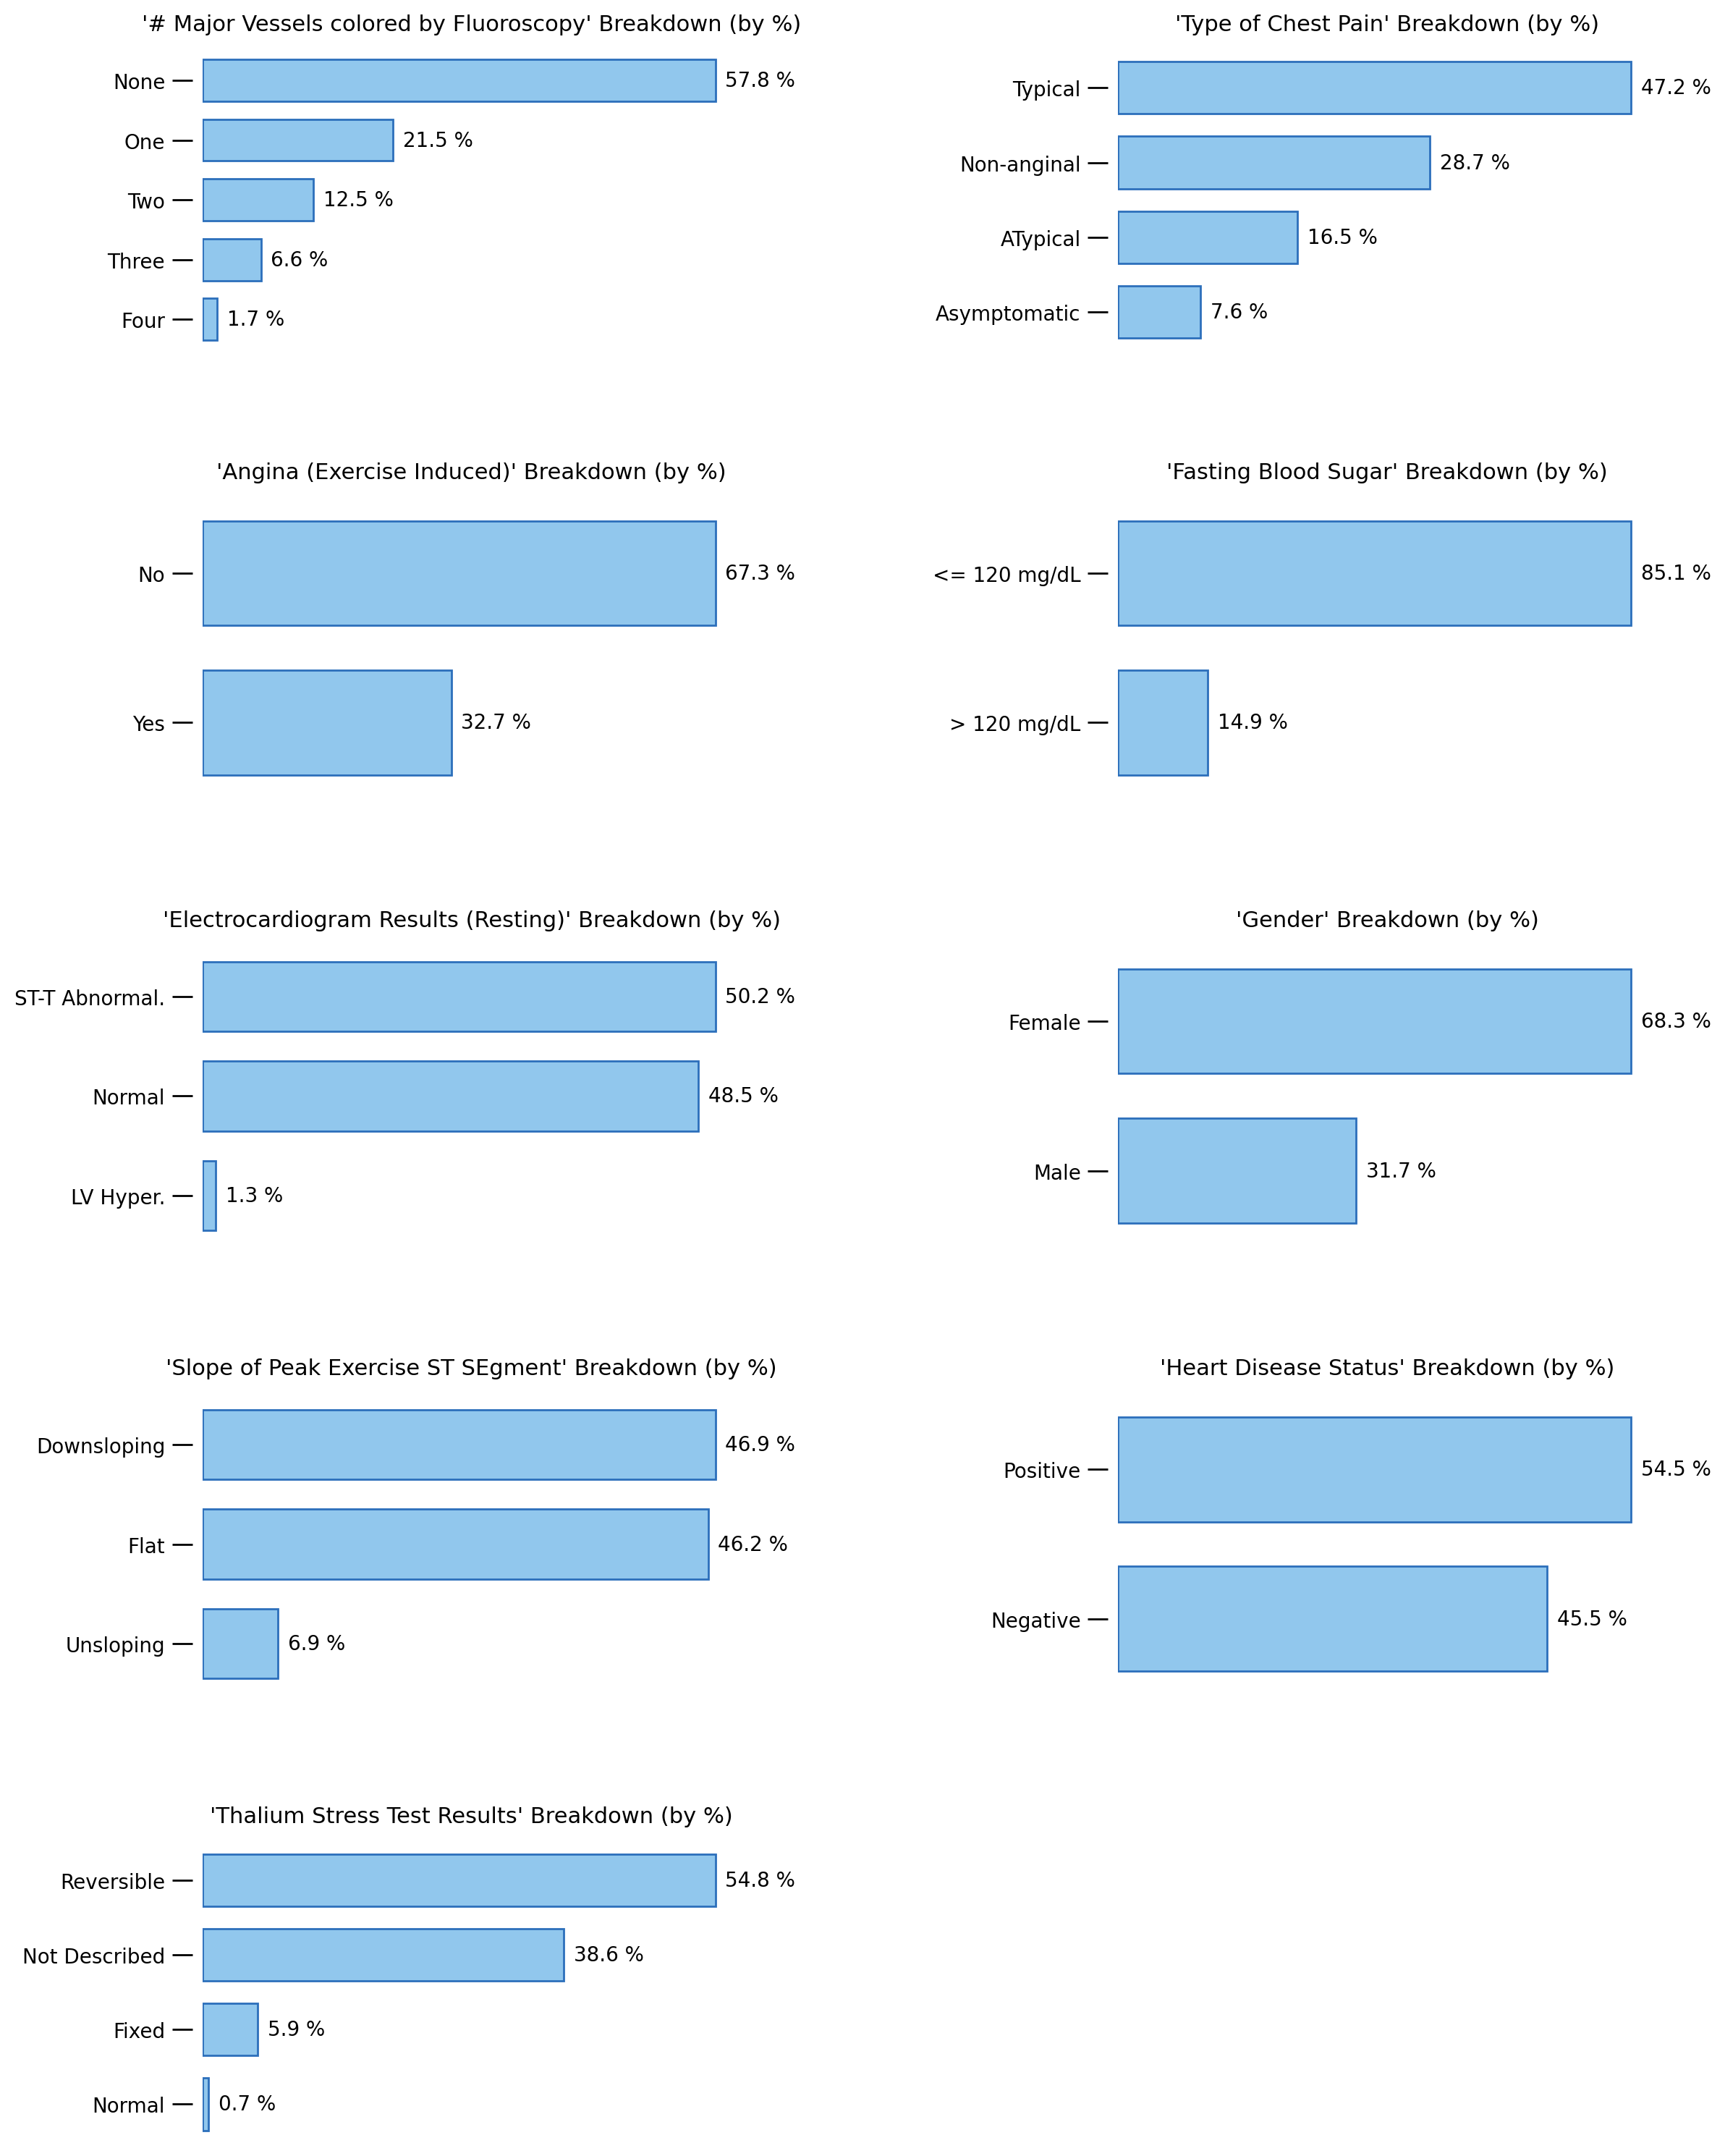

In [9]:
# Filter out the categorical variables
data_categorical = data[features_discrete]

# Set up the plot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15), dpi=200)

# Loop through the categorical variables and plot
for col, ax in zip(data_categorical.columns, axes.flatten()):
    # Extract the relevant column
    datum = data_categorical[col]

    # Extract the data
    value_counts = datum.value_counts()
    order = value_counts.index

    # Plot the frequency of each unique value per feature
    sns.countplot(
        data=datum.to_frame(),
        order=order,
        y=col,
        stat="percent",
        color="xkcd:sky",
        edgecolor="xkcd:medium blue",
        width=0.7,
        ax=ax,
    )

    # Assign meaningful labels to ticks
    labels = ser_encodings[col][order]
    ax.set_yticks(ax.get_yticks(), labels)

    # Assign values to bars
    ax.bar_label(*ax.containers, padding=5, fmt=lambda val: f"{val:.1f} %")

    # Assign the x and y labels
    ax.set_title(f"'{ser_titles[col]}' Breakdown (by %)", fontsize=11, pad=10)
    ax.set_ylabel("")
    ax.set_xlabel("")

    # Remove the spines
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
    ax.spines["left"].set_position(("outward", 10))

    # Remove the x ticks and labels
    ax.set_xticks([], [])

    # Adjust ticks along y axis
    ax.tick_params(direction="inout", length=10, width=1)


# Remove the last axes
axes.flatten()[-1].set_visible(False)

# Remove any overlap
plt.tight_layout()

# Increase vertical spacing between axes
plt.subplots_adjust(hspace=0.5, wspace=0.7)

# Render the plot
plt.show()

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">C. Bivariate Analysis</h3>

<div style="font-size:15px">
    
In this section, we will examine how individual features relate to the target variable. This analysis will help us identify key predictors of heart disease.

As always, we'll begin with continuous features. To visualize the data, we'll use bar plots to display the average value of each feature per target class. Additionally, we'll overlay distribution functions to compare feature distributions across target classes.

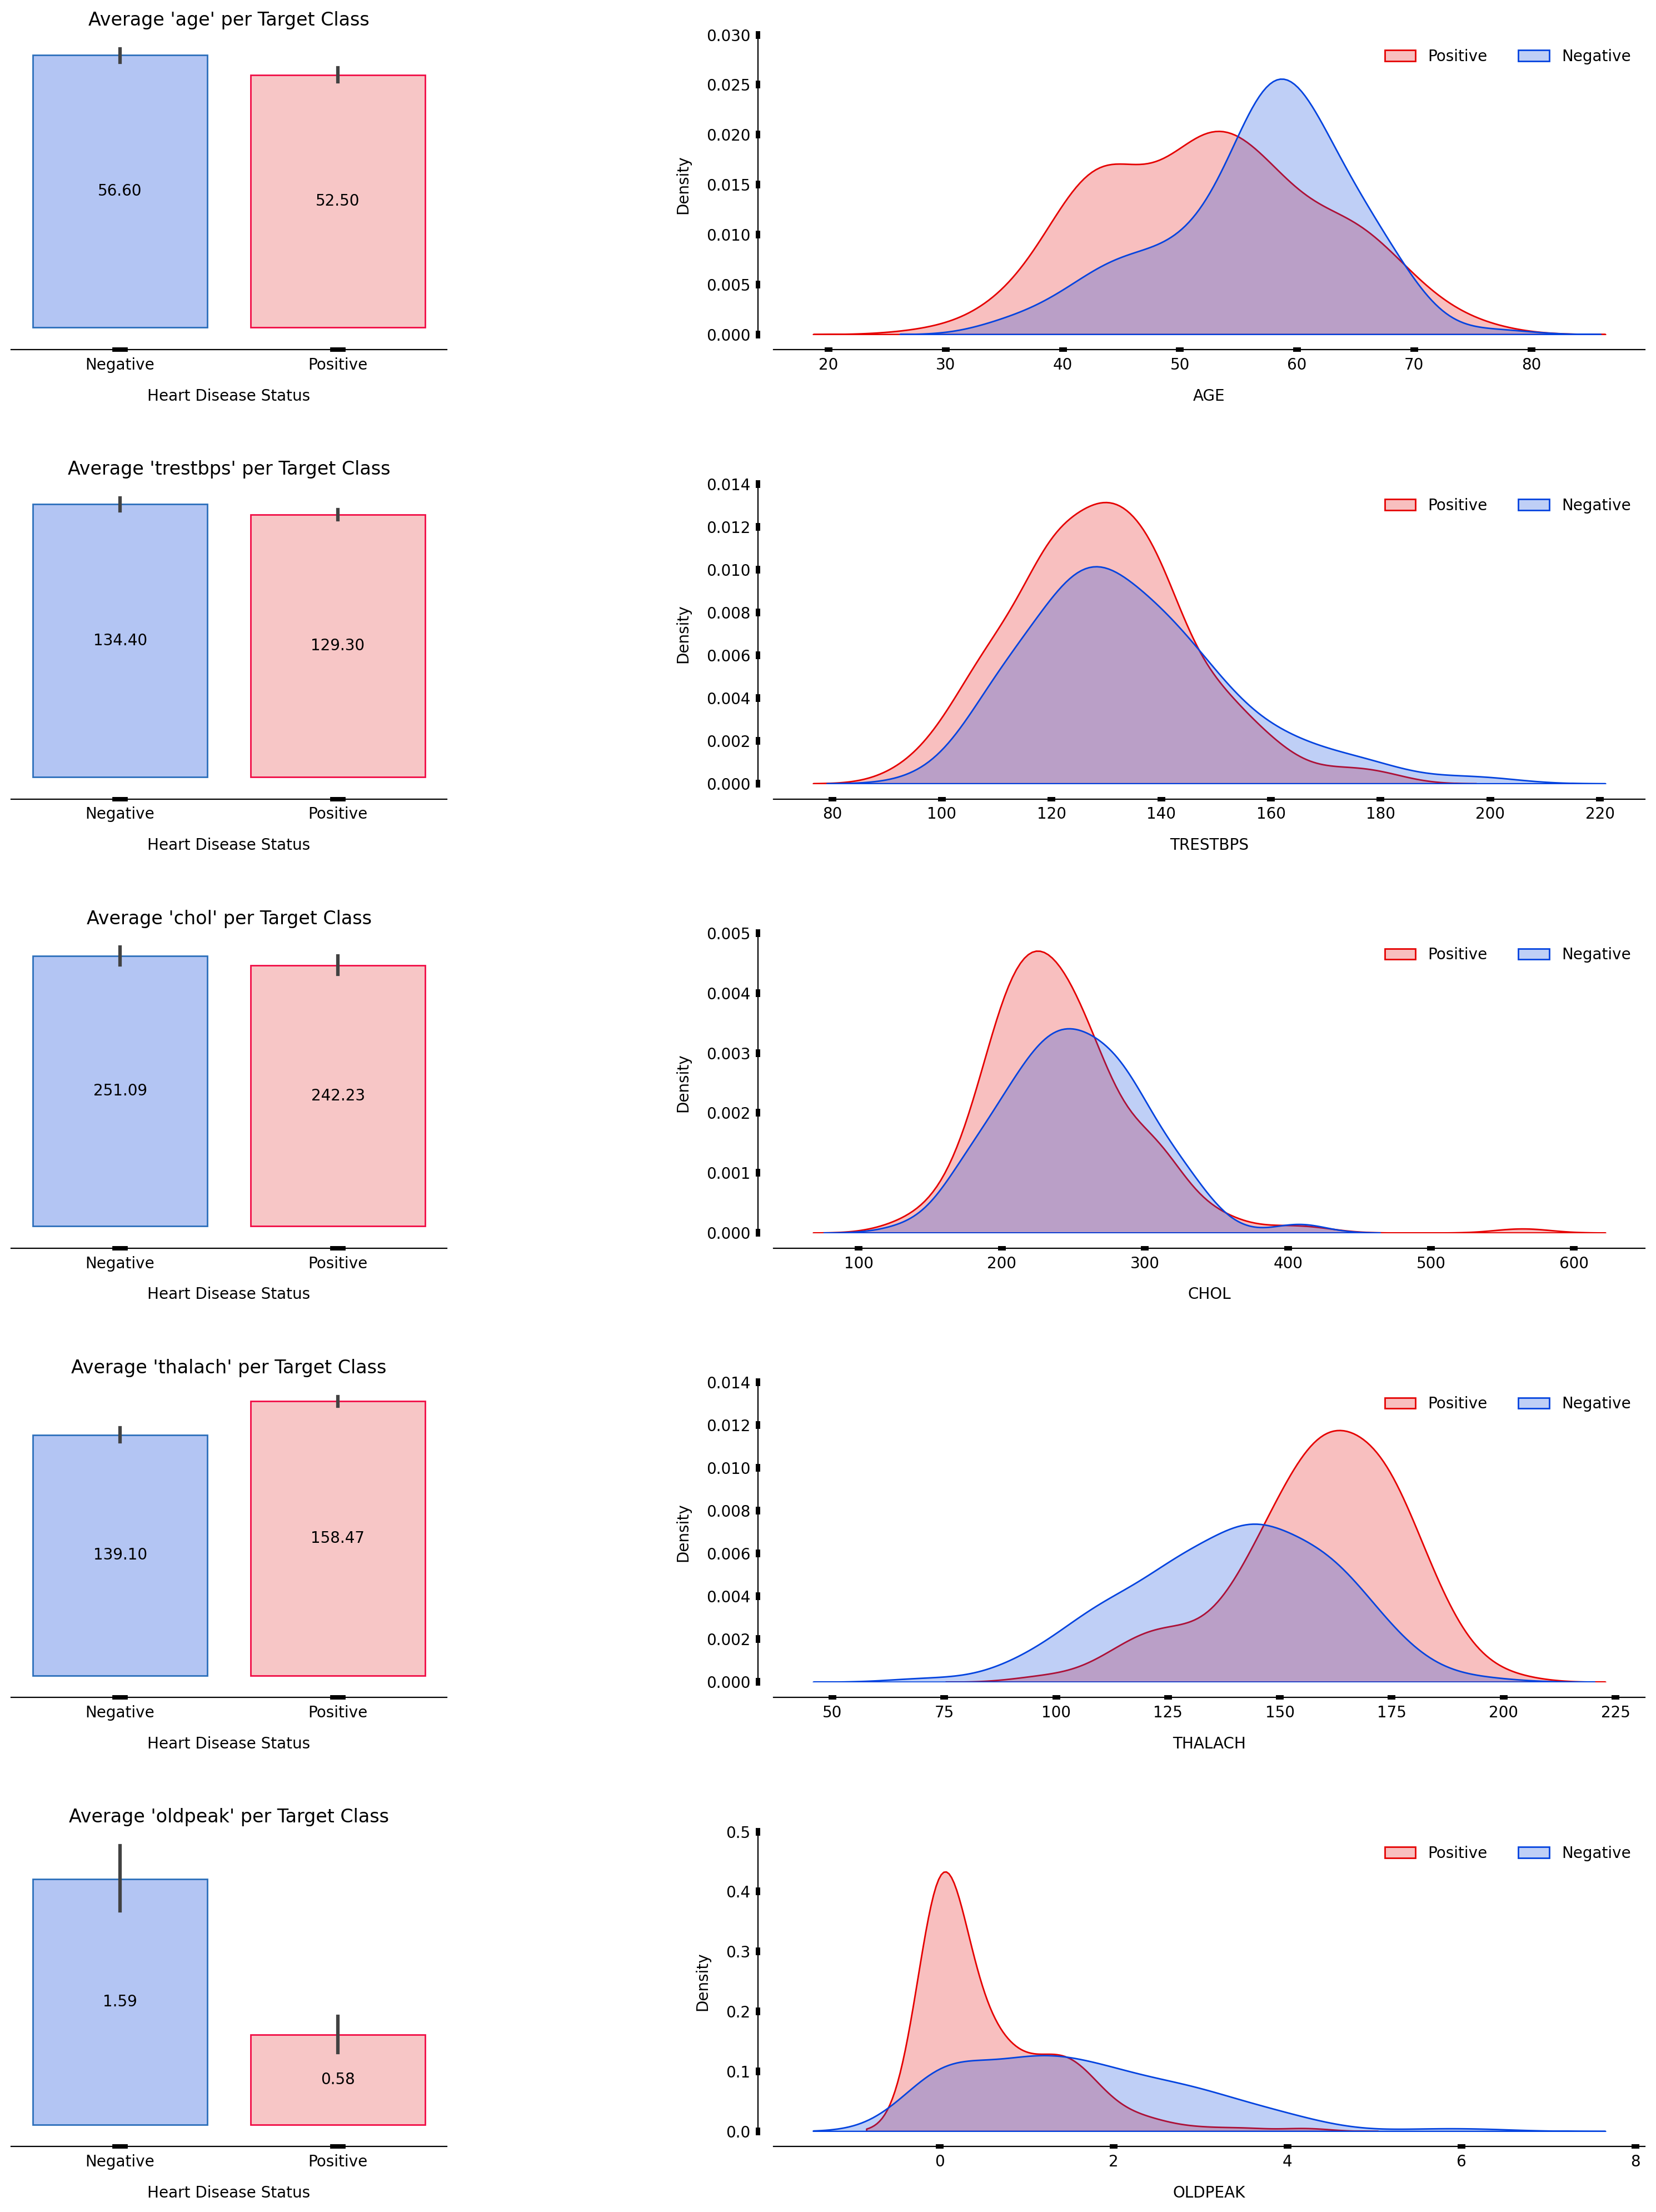

In [10]:
# Set up the plot
fig, axes = plt.subplots(
    nrows=5, ncols=2, figsize=(15, 20), gridspec_kw=dict(width_ratios=[1, 2]), dpi=200
)

colors_bars = ["#a8c1fe", "#ffbebe"]
colors_histograms = ["xkcd:blue", "xkcd:red"]
edge_colors = ["xkcd:medium blue", "xkcd:pinkish red"]


for feature, ax in zip(features_continuous, axes):
    ax_left, ax_right = ax

    # Left Axes
    sns.barplot(
        data=data,
        y=feature,
        x="target",
        hue="target",
        palette=colors_bars,
        legend=False,
        ax=ax_left,
    )

    for patch, color in zip(ax_left.patches, edge_colors):
        patch.set_edgecolor(color)

    ax_left.set_xlabel(ser_titles["target"], labelpad=10)
    ax_left.set_xticks(ax_left.get_xticks(), ser_encodings["target"][:])
    ax_left.set_title(f"Average '{feature}' per Target Class")

    [
        ax_left.bar_label(container, fmt=lambda x: f"{x:.2f}", label_type="center")
        for container in ax_left.containers
    ]

    ax_left.spines[["top", "right", "left"]].set_visible(False)
    ax_left.spines[["left", "bottom"]].set_position(("outward", 10))

    ax_left.tick_params(direction="inout", length=3, width=5)
    ax_left.tick_params(axis="x", direction="inout", length=3, width=10)

    _, upper = np.array(ax_left.get_yticks())[[0, -1]]
    ax_left.set_ylim(bottom=-upper / 50)
    ax_left.set_yticks([], [])
    ax_left.set_ylabel("")

    # Right Axes
    sns.kdeplot(
        data=data,
        x=feature,
        hue="target",
        palette=colors_histograms,
        fill=True,
        ax=ax_right,
    )

    handles, labels = ax_right.get_legend_handles_labels()
    ax_right.legend(labels=["Positive", "Negative"], frameon=False, ncols=2)

    ax_right.spines[["top", "right"]].set_visible(False)
    ax_right.spines[["left", "bottom"]].set_position(("outward", 10))

    ax_right.tick_params(direction="inout", length=3, width=5)

    ax_right.set_ylabel("Density", labelpad=10)
    ax_right.set_xlabel(feature.upper(), labelpad=10)

    lower, upper = np.array(ax_right.get_yticks())[[0, -1]]
    ax_right.set_ylim(lower, upper)


# Ensure no overlap
plt.tight_layout()

# Increase vertical spacing between axes
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Render the plot
plt.show()

<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>
</div>

<div style="font-size:15px">
    
For categorical features, let's create a stacked plot to visualize the proportion of each category across the two target classes. We'll also include exact counts and percentages for better clarity.

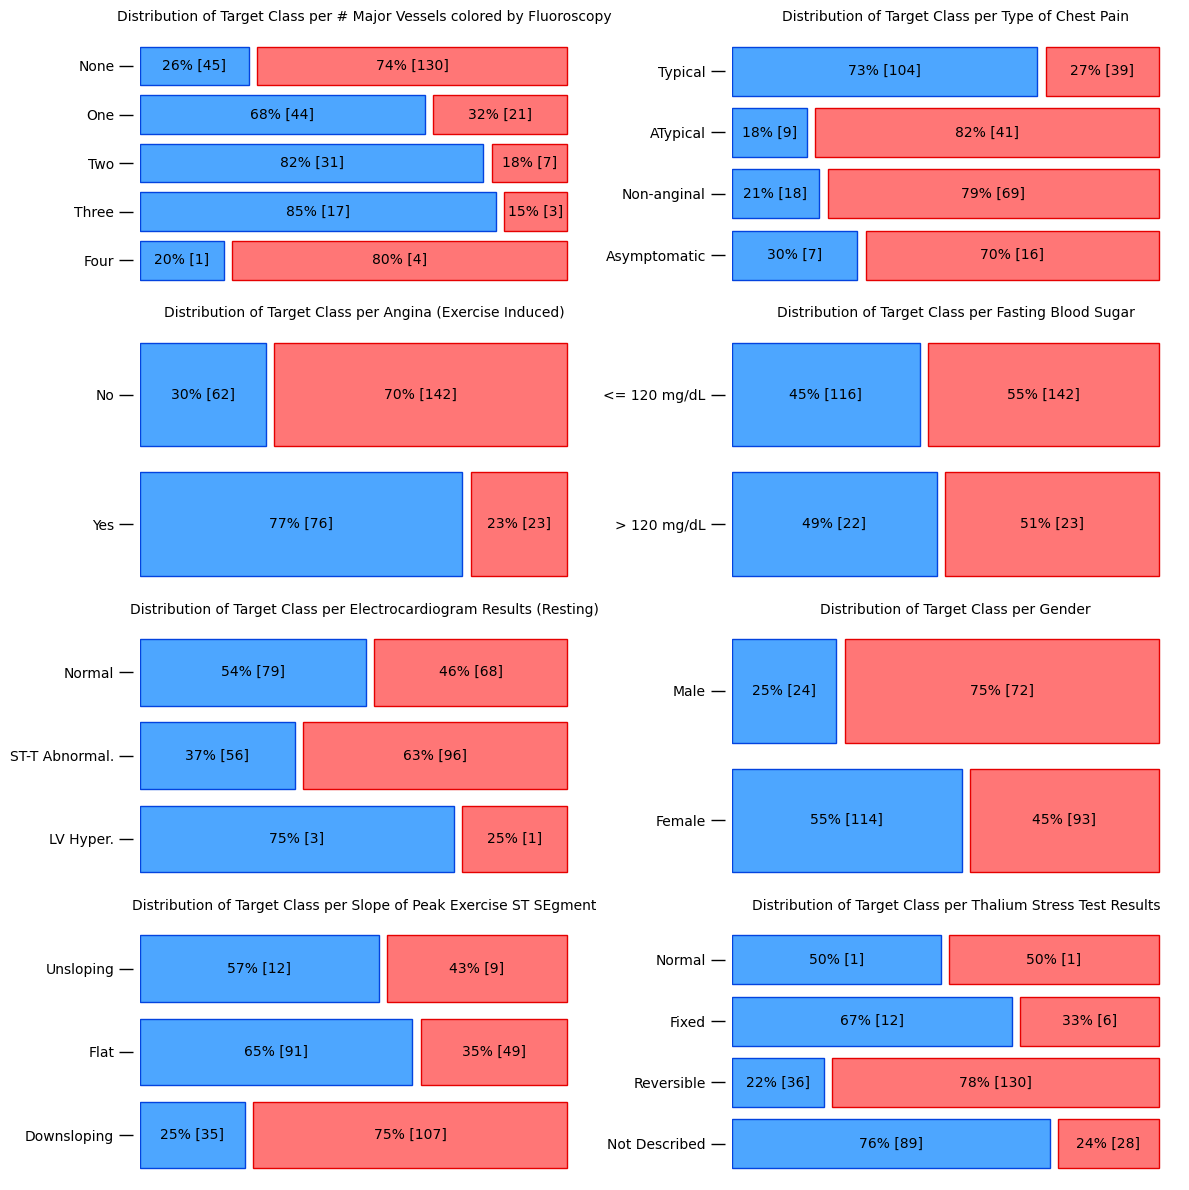

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12, 12))

features_discrete_without_target = features_discrete.drop("target")

for ax, feature in zip(axes.flatten(), features_discrete_without_target):
    datum = data.groupby([feature, "target"]).size()
    sums = datum.groupby(feature).sum()
    ratios = (datum / sums).round(2)

    labels = sums.index

    left = 0

    for label in labels:
        ax.barh(
            y=label,
            width=ratios[label][0],
            color="#4da6ff",
            edgecolor="xkcd:blue",
        )

        left = ratios[label][0]

        ax.barh(
            y=label,
            width=ratios[label][1],
            left=left + 0.02,
            color="#ff7676",
            edgecolor="xkcd:red",
        )

        ax.set_title(
            f"Distribution of Target Class per {ser_titles[feature]}",
            fontsize=10,
            pad=10,
        )

    # Set the y tick labels
    ax.set_yticks(ticks=labels, labels=ser_encodings[feature][:])

    # Remove the top, right, left, and bottom spines
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)

    # Remove the x ticks and labels
    ax.set_xticks([], [])

    # Move the left spine 10 pixels left
    ax.spines["left"].set_position(("outward", 10))

    # Adjust the ticks
    ax.tick_params(direction="inout", length=10, width=1)

    # Add the annotations
    totals = datum.values
    for idx, container in enumerate(ax.containers):
        ax.bar_label(
            container,
            label_type="center",
            fmt=lambda x: f"{x * 100:.0f}% [{totals[idx]}]",
        )

    # Invert y-axis
    ax.invert_yaxis()


plt.tight_layout()
plt.show()

<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>
</div>

<h2 style="font-weight: bold; font-size: 22px; margin-bottom: 10px;">2. Preprocessing Steps</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">A. Remove Irrelevant Features</h3>


<div style="font-size:15px">

From our EDA section, we can see that every variable has some level of correlation with the target variable. Therefore, we will retain all features. Additionally, since the dataset is small, maximizing the use of available data is in our best interest.

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">B. Handle Missing Values</h3>

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<div style="font-size:15px">

Our dataset contains no missing values, which is ideal. This saves us from the challenges of imputation or removal, both of which could introduce bias or further reduce our already small dataset.

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">C. Address Outliers</h3>

<div style="font-size:15px">

We will identify outliers in the continuous features using the IQR method. According to this method, an observation is considered an outlier if it falls below the 
first quartile (Q1) minus 1.5 times the interquartile range (IQR) or above the third quartile (Q3) plus 1.5 times the IQR.

In [13]:
Q1 = data_continuous.quantile(0.25)
Q3 = data_continuous.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = ((data_continuous < lower_limit) | (data_continuous > upper_limit)).sum()
outliers

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Features Containing Outliers</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Sensitivity to Outliers</li>
    <p>
        - <b>SVMs</b>: SVMs can be sensitive to outliers. Although the decision boundary is primarily determined by support vectors, outliers may influence which points are chosen, potentially leading to suboptimal classification. <br>
        - <b>Decision Trees (DT) & Random Forests (RF)</b>: These tree-based models are generally robust to outliers. Since they split based on feature values, outliers often end up in leaf nodes, minimizing their impact on overall decision-making. <br>
        - <b>K-Nearest Neighbors (KNN)</b>: KNN is sensitive to outliers as it relies on distance measurements to make predictions. Outliers can distort these distances, affecting classification accuracy. <br>
        - <b>AdaBoost</b>: While AdaBoost is generally robust to outliers, its iterative process can sometimes overemphasize them, making the final model more sensitive. This is especially true when outliers receive higher weights in subsequent iterations
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Outlier Treatment</li>
    <p>
        - <b>Removal of Outliers</b>: This involves discarding data points that fall outside a defined range. <br> 
        - <b>Capping Outliers</b>: Instead of removing outliers, we can limit their values to a specific threshold, such as the 1st or 99th percentile, to reduce their impact without losing data. <br>
        - <b>Transformations</b>: Applying transformations, like logarithmic or Box-Cox transformations, can help reduce the influence of outliers and make the data more Gaussian-like. <br>
        - <b>Robust Scaling</b>: Methods such as the RobustScaler in Scikit-learn scale features using statistics that are less sensitive to outliers, offering a more robust approach.
    </p>
</ul>

Considering the nature of the algorithms, particularly SVM and KNN, along with the small size of our dataset, directly removing outliers may not be the most effective approach. Instead, we will prioritize applying transformations like Box-Cox in the next steps to mitigate the impact of outliers and make the data more suitable for modeling.
</div>

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">D. Encode Categorical Variables</h3>

<div style="font-size:15px">

For our categorical variables, we can distinguish between nominal and ordinal types. **Nominal variables** represent distinct categories and are typically well-suited for one-hot encoding. Treating them as numbers might unintentionally imply an order that doesn’t exist.

In contrast, **ordinal variables** have an inherent hierarchy. These are usually represented by numbers with increasing or decreasing values that reflect their literal meanings.

Given the above explanation:

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">sex</li>
    <p>
        - Since gender has only two categories, we can represent it with a single column. One-hot encoding is unncessary for binary features. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">cp</li>
    <p>
        - The values represent different types of chest pains but do not necessarily indicate whether one type of chest pain is worse that another. Because of this, we can treat cp as a categorical nominal variable that will be one-hot encoded. <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">fbs</li>
    <p>
        - Again, binary variables do not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">restecg</li>
    <p>
        - This variable represents the resting electrocardiographic results. Again, no inhrent order in whether one value is better or worse than another, so we will one-hot encode. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">exang</li>
    <p>
        - Again, binary variables do not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">slope</li>
    <p>
        - The values seem to follow a trend (upsloping, flat, downloping), so we will consider this as a categorical ordinal variable.<br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">ca</li>
    <p>
        - This represents the # of vessels colored by fluoroscopy. As it indicates a count, it has an inhrent order. Therefore, it does not need to be one-hot encoded. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">thal</li>
    <p>
        - The variable represnts the thalium stress test results. The different states do not indicate any order and so will be one-hot encoded. <br> 
    </p>
</ul>

In summary:

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Variables that require one-hot encoding</li>
    <p>
        - cp <br>
        - restecg <br>
        - thal <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Variables that do not require one-hot encoding</li>
    <p>
        - sex <br>
        - fbs <br>
        - exang <br>
        - ca <br>
    </p>
</ul>

In [14]:
# Features to be encoded
features_to_encode = ["cp", "restecg", "thal"]

# One-hot encode the specified features
data_encoded = pd.get_dummies(data, columns=features_to_encode, drop_first=True, dtype=int)

# Convert the remaining categorical features into integers
for feature in features_discrete.difference(features_to_encode):
    data_encoded[feature] = data_encoded[feature].astype(int)

# Verify
data_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1           int32
cp_2           int32
cp_3           int32
restecg_1      int32
restecg_2      int32
thal_1         int32
thal_2         int32
thal_3         int32
dtype: object

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">E. Feature Scaling</h3>

<div style="font-size:15px">

**Feature scaling** is crucial for algorithms sensitive to the magnitudes or scales of features. It ensures that all features contribute equally to the model's decision-making process, preventing features with larger magnitudes from dominating.

Because not all of our models require feature scaling, we'll defer this step until the model creation phase. At that point, we'll use pipelines to apply scaling tailored to each model's specific needs.

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">F. Transforming Skewed Features</h3>

<div style="font-size:15px">

In our univariate analysis of the continuous features, we noticed that many of the variables are skewed toward one end of the distribution. This skewness can affect the performance of machine learning models, so we aim to stabilize the variance and, ideally, transform the data to approximate a normal distribution. The **Box-Cox transformation** is a useful tool for achieving this, as it helps make the data more normally distributed.

However, it's important to remember that the Box-Cox transformation can only be applied to positive values, so any negative or zero values in the dataset will need special handling.

To prevent **data leakage**—which occurs when information from outside the training dataset inadvertently influences the model's training—we will split the data into training and test sets. We will compute the Box-Cox transformation parameters based solely on the training data and then apply these parameters to transform the test set, ensuring that the model's evaluation is fair and unbiased.

In [15]:
# Split between the features and target
X = data_encoded.drop(columns="target")
y = data_encoded["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Add a small amount to `oldpeak` to prevent errors when using the box-cox transformation
X_train["oldpeak"] += 0.001
X_test["oldpeak"] += 0.001

<div style="font-size:15px">

Let’s compare the distribution of the numerical features before and after applying the Box-Cox transformation.

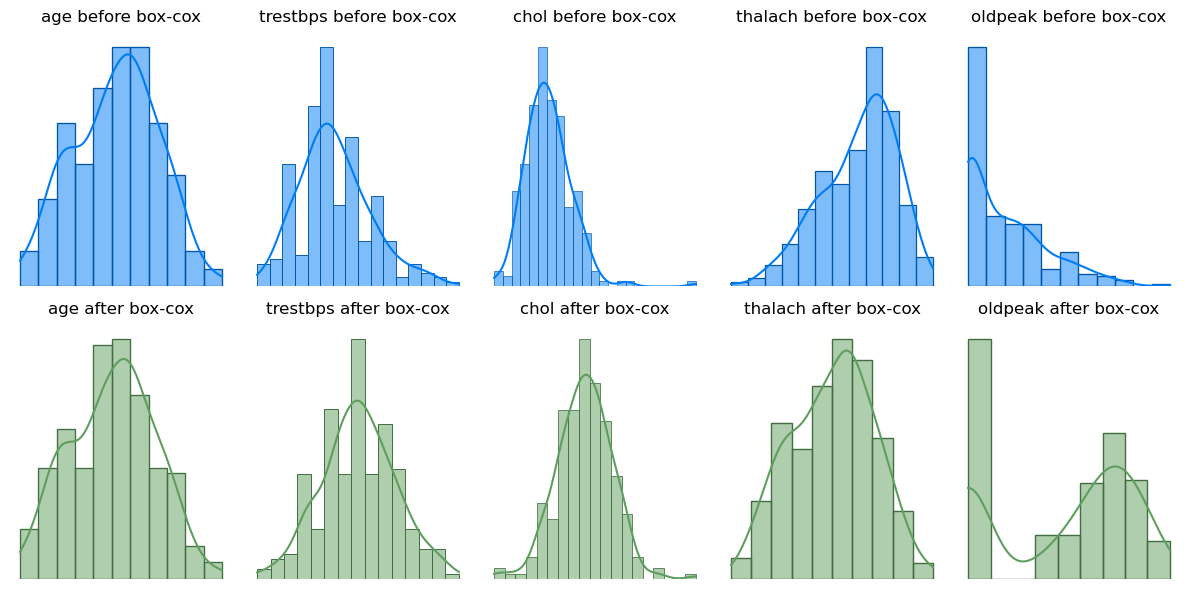

In [16]:
from scipy.stats import boxcox

# Generate the figure
fig, axes = plt.subplots(ncols=len(features_continuous), nrows=2, figsize=(12, 6))

# Seperate the top and bottom axes
axes_top, axes_bottom = axes

# Loop through each feature and draw the original and transformed histograms
for feature, ax_top, ax_bottom in zip(features_continuous, axes_top, axes_bottom):
    # Extract the feature
    datum = X_train[feature]

    # Draw the original histogram
    sns.histplot(data=datum, kde=True, color="#007df6", ax=ax_top, edgecolor="#0055a7")

    ax_top.set_title(f"{feature} before box-cox", pad=10)

    # Dict to store lambda values
    lambdas = {}

    # Obtain the transformed feature along w/ corresponding lambda
    X_train[feature], lambdas[feature] = boxcox(X_train[feature])

    # Apply transformation to test feature as wells
    X_test[feature] = boxcox(X_test[feature], lmbda=lambdas[feature])

    # Draw the new histogram
    sns.histplot(
        data=X_train[feature],
        kde=True,
        color="#5f9e5f",
        ax=ax_bottom,
        edgecolor="#416d41",
    )

    ax_bottom.set_title(f"{feature} after box-cox", pad=10)

# Style the axes
for ax in axes.flatten():
    ax.spines[:].set_visible(False)
    ax.set_xticks((), ())
    ax.set_yticks((), ())
    ax.set_xlabel("")
    ax.set_ylabel("")


# Avoid any overlap
plt.tight_layout()

# Render the plot
plt.show()

<div style="font-size:15px">

**Observations**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>
</div>

<h2 style="font-weight: bold; font-size: 22px; margin-bottom: 10px;">3. Model Building</h2>

<hr style="
    border: none;
    height: 1px;
    background: black;
    "> 

<div style="font-size:15px">

When diagnosing patients with an illness, having a high recall (sensitivity) for the positive class is often more crucial than focusing on precision. High recall ensures that most patients who actually have the illness are correctly identified, even if it results in some false positives. The reasoning behind this is simple: it’s better to have a few false alarms—where healthy patients are mistakenly diagnosed as sick—than to risk overlooking a patient who actually has the illness. In the medical field, missing a diagnosis can have serious consequences, so it's typically more important to cast a wider net to identify those who may need treatment, even at the cost of some additional follow-ups for false positives.

<div style="font-size:15px">

I've decided to create my own custom function `custom_GridSearchCV()` for hyperparameter tuning for the models we'll be working with in this section. While I am aware of the `GridSearchCV()` function, it returns a lot of information, much of which isn't directly relevant to my needs. By building my own function, I can tailor the output to focus on what's important to me. Additionally, this approach allows me to incorporate the `tqdm` package, which will give me a nice progress bar to visually track the training process.

<div style="font-size:15px">

On a side note, this function will return the results sorted in descending order based on the first error metric specified in the scoring parameters. 

</div>

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">A. Decision Trees</h3>

<div style="font-size:15px">
    
**Training the Model**

</div>

<div style="font-size:15px">
    
Let’s go ahead and initialize our Decision Tree model, along with a few key hyperparameters. We’ll also train the model and track important error metrics, with recall being the most crucial, as discussed.

</div>

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model = DecisionTreeClassifier(random_state=0)

# Set up hyperparamter grid for cross-validation
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
}

# Train the model
cv_results = custom_GridSearchCV(
    model,
    param_grid,
    X_train,
    y_train,
    scoring=["recall", "f1", "precision", "accuracy"],
    random_state=0,
)

  0%|          | 0/24 [00:00<?, ?it/s]

<div style="font-size:15px">

We'll also use a custom function to display the parameters of our model, along with the scoring metrics. This will provide us with a clean and organized way of representing our results.

</div>

<div style="font-size:15px">
    
**Printing the Parameters & Error Metrics**

</div>

In [18]:
model_spces = custom_model_specs(title="Decision Tree Classifier", result=cv_results[0])
print(model_spces)

•———————————————————————————————•
|    Decision Tree Classifier   |
•———————————————————•———————————•
|     Parameter     |   Value   |
•———————————————————•———————————•
|     criterion     |  entropy  |
|     max_depth     |     3     |
|  min_samples_leaf |     1     |
| min_samples_split |     2     |
•———————————————————•———————————•
|   Scoring Metric  | Value (%) |
•———————————————————•———————————•
|       recall      |    0.80   |
|         f1        |    0.79   |
|     precision     |    0.77   |
|      accuracy     |    0.76   |
•———————————————————•———————————•


<div style="font-size:15px">
    
**Confusion Matrix & Classification Report**

</div>

<div style="font-size:15px">

Let’s go ahead and examine the confusion matrix and classification report for the training and testing dataset.

</div>

In [19]:
model = cv_results[0]["estimator"]
labels = ser_encodings["target"]

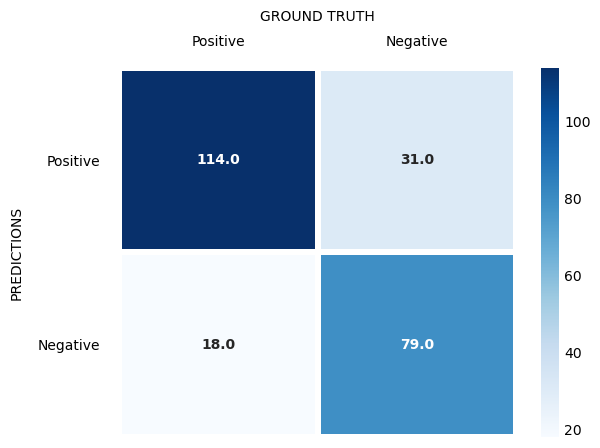

,precision,recall,f1-score
Negative,0.814433,0.718182,0.763285
Positive,0.786207,0.863636,0.823105
accuracy,0.797521,0.797521,0.797521
macro avg,0.800320,0.790909,0.793195
weighted avg,0.799037,0.797521,0.795914


In [22]:
## Training Data
y_pred = model.predict(X_train)

custom_confusion_matrix(y_train, y_pred, labels=labels)
custom_classification_report(y_train, y_pred, labels=labels)

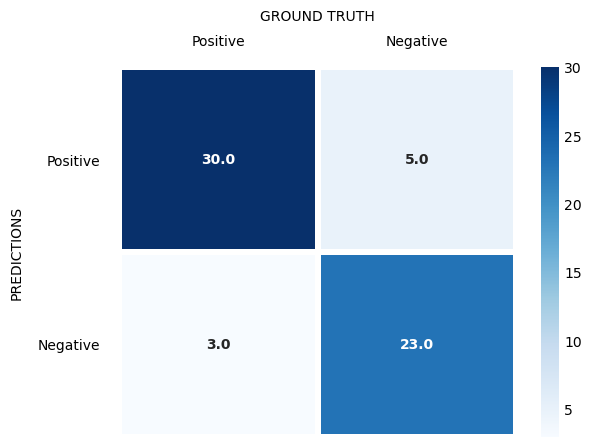

,precision,recall,f1-score
Negative,0.884615,0.821429,0.851852
Positive,0.857143,0.909091,0.882353
accuracy,0.868852,0.868852,0.868852
macro avg,0.870879,0.865260,0.867102
weighted avg,0.869753,0.868852,0.868352


In [23]:
## Testing Data
y_pred = model.predict(X_test)

custom_confusion_matrix(y_test, y_pred, labels=labels)
custom_classification_report(y_test, y_pred, labels=labels)

<h3 style="font-weight: bold; font-size: 18px; margin-bottom: 10px;">B. Random Forest</h3>